In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
#from scipy.optimize import curve_fit
from IPython.core.pylabtools import figsize
figsize(12, 8)

# Enter no. of re-runs --- CURRENTLY: 5 for T=200-1200K
# Still to run: 25K increments close to Tcs for 2D and 3D + T=175-1175K
runs=5

# Combine data files for multiple runs
for f in glob.glob("3D/Q_run*.dat"):
         os.system("cat "+f+" >> all_Q_data_3D.dat")
### Add same again for 2D
for f in glob.glob("2D/Q_run*.dat"):
         os.system("cat "+f+" >> all_Q_data_2D.dat")

# Plot multiple systems together
exptl_data= np.genfromtxt('expt_CZTSe_Q_vs_T.csv', delimiter = ',' ) # Exptl reference
file1= np.genfromtxt('3D/Q_run1.dat', delimiter = ' ') # Single run to compare to
all_Q_data_3D = np.genfromtxt('all_Q_data_3D.dat', delimiter = ' ') # Combined data from all runs
### Add same again for 2D
file2= np.genfromtxt('2D/Q_run1.dat', delimiter = ' ') # Single run to compare to
all_Q_data_2D = np.genfromtxt('all_Q_data_2D.dat', delimiter = ' ') # Combined data from all runs

#plt.xlabel('Simulation temperature ($^{\circ}$C)')
plt.xlabel('Simulation temperature (K)')
plt.ylabel('Order parameter S')
plt.plot(exptl_data[:,0]+70+273.15, exptl_data[:,1], marker="^", label ='Experiment') # Shift by 70 to compare CZTSe to CZTS and convert from C to K

#plt.scatter(all_data[:,0]-273.15, abs(all_data[:,1]), marker="x", color="orange",  s=10, label='CZTS Monte Carlo model, '+str(runs)+' independent runs')
plt.scatter(all_Q_data_3D[:,0], abs(all_Q_data_3D[:,1]), marker="o", color="orange", label='3D Cu/ Zn disorder')
plt.scatter(all_Q_data_2D[:,0], abs(all_Q_data_2D[:,1]), marker="x", color="green", label='2D Cu/ Zn disorder')

# Add polynomial line of best fit to all_data
x_3D = all_Q_data_3D[:,0]
y_3D = abs(all_Q_data_3D[:,1])
### Add y2 for 2D? + edit below
x_2D = all_Q_data_2D[:,0]
y_2D = abs(all_Q_data_2D[:,1])

# Polynomial fit for 3D Cu/ Zn disorder
z_3D = np.polyfit(x_3D, y_3D, 12) # deg of polynomial just chosen to give best shape to curve
f_3D = np.poly1d(z_3D)
x_new_3D = np.linspace(min(x_3D), max(x_3D), 50)
y_new_3D = f_3D(x_new_3D)
#plt.plot(x_3D,y_3D,'o', x_new_3D, y_new_3D, color="orange")
# Polynomial fit for 2D Cu/ Zn disorder
z_2D = np.polyfit(x_2D, y_2D, 13) # deg of polynomial just chosen to give best shape to curve
f_2D = np.poly1d(z_2D)
x_new_2D = np.linspace(min(x_2D), max(x_2D), 50)
y_new_2D = f_2D(x_new_2D)
#plt.plot(x_2D,y_2D,'x', x_new_2D, y_new_2D, color="green")

plt.legend(loc='upper right', frameon=False)
plt.rcParams.update({'font.size': 20})

plt.xlim(200,1200)
#plt.ylim(-0.1,1.0)

plt.savefig("Q_param_2D+3D+expt.png")
plt.show()

<Figure size 1200x800 with 1 Axes>

For 3D plot: [  5.90973231e-02   5.97972374e+02]
T at S=0.5 is: 597.972374158
For 2D plot: [  5.17333954e-02   7.05591074e+02]
T at S=0.5 is: 705.591074108


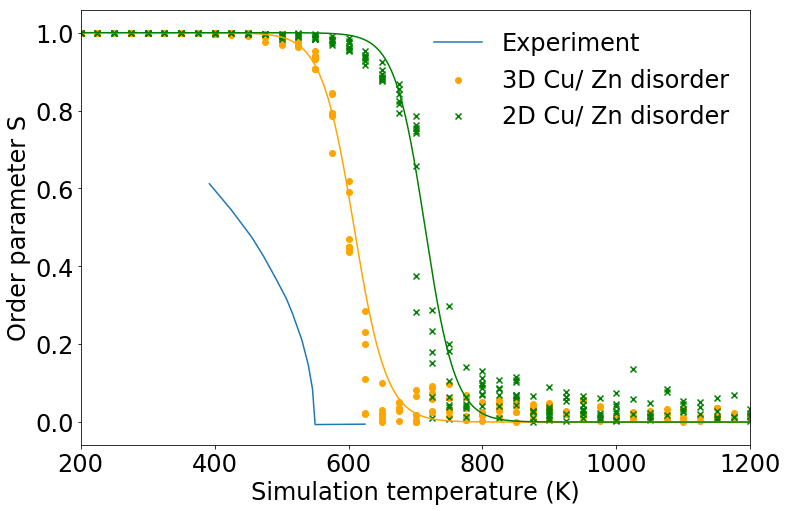

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy.optimize import curve_fit
from IPython.core.pylabtools import figsize
figsize(12, 8)

# Clear out previous files
os.system("rm all_Q_data_3D.dat")
os.system("rm all_Q_data_2D.dat")
os.system("touch all_Q_data_3D.dat")
os.system("touch all_Q_data_2D.dat")

# Combine data files for multiple runs
for f in glob.glob("3D/Q_run*.dat"):
         os.system("cat "+f+" >> all_Q_data_3D.dat")
### Add same again for 2D
for f in glob.glob("2D/Q_run*.dat"):
         os.system("cat "+f+" >> all_Q_data_2D.dat")

# Plot multiple systems together
exptl_data= np.genfromtxt('expt_CZTSe_Q_vs_T.csv', delimiter = ',' ) # Exptl reference
all_Q_data_3D = np.genfromtxt('all_Q_data_3D.dat', delimiter = ' ') # Combined data from all runs
all_Q_data_2D = np.genfromtxt('all_Q_data_2D.dat', delimiter = ' ') # Combined data from all runs

plt.xlabel('Simulation temperature (K)')
plt.ylabel('Order parameter S')
plt.plot(exptl_data[:,0]+70+273.15, exptl_data[:,1], label ='Experiment') # Shift by 70 to compare CZTSe to CZTS and convert from C to K

plt.scatter(all_Q_data_3D[:,0], abs(all_Q_data_3D[:,1]), marker="o", color="orange", label='3D Cu/ Zn disorder')
plt.scatter(all_Q_data_2D[:,0], abs(all_Q_data_2D[:,1]), marker="x", color="green", label='2D Cu/ Zn disorder')

x_3D = all_Q_data_3D[:,0]
x_2D = all_Q_data_2D[:,0]
x_plot_3D = np.linspace(min(x_3D), max(x_3D), 1475)
x_plot_2D = np.linspace(min(x_2D), max(x_2D), 1200)
#print(x_plot_3D)

def fsigmoid(x):
    return 1 / (1+ np.exp(-x))

def fsigmoid_modified(x, a, b):
    # (-std sigmoid func) + 1 is needed to reflect function about y-axis
    # b shifts centre of sigmoid from 0 to the specified value
    # a changes steepness (smaller for less steep)
    return (-1 / (1 + np.exp((-a*(x-b))))) + 1

#popt, pcov = curve_fit(fsigmoid, all_Q_data_3D[:,0], abs(all_Q_data_3D[:,1]), p0=[1000, 0.001])
popt, pcov = curve_fit(fsigmoid_modified, all_Q_data_3D[:,0], abs(all_Q_data_3D[:,1]), p0=[0.05, 600.0])
print("For 3D plot: "+str(popt))
# x = np.ln((1/1-y)-1)*(-1/a)+b
# For y=0.5 the above eqn just cancels to b
print("T at S=0.5 is: "+str(popt[1]))
plt.plot(fsigmoid_modified(x_plot_3D, *popt), color='orange')

popt, pcov = curve_fit(fsigmoid_modified, all_Q_data_2D[:,0], abs(all_Q_data_2D[:,1]), p0=[0.05, 750.0])
print("For 2D plot: "+str(popt))
print("T at S=0.5 is: "+str(popt[1]))
plt.plot(fsigmoid_modified(x_plot_2D-80, *popt), color='green')


plt.legend(loc='upper right', frameon=False)
plt.rcParams.update({'font.size': 24})

plt.xlim(200,1200)

plt.savefig("fig6_Q_param_2D+3D+expt.png")
plt.show()
